In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


## data preparation

In [2]:
from pathlib import Path

path = Path() / "dataset_cleaned"
print(path)

npz


In [3]:
my_data_num = np.load(path / "digit_data_TrVal_corrected.npz")
my_data_sym = np.load(path / "op_data_TrVal_corrected.npz")

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    # Show axis for now
    # plt.axis("off")

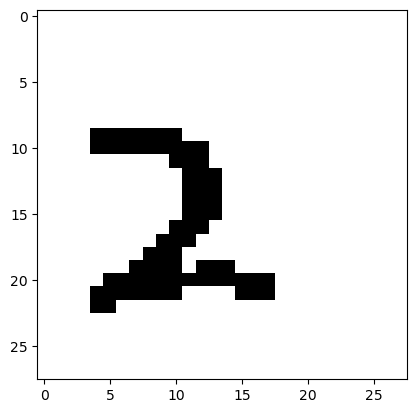

In [5]:
sample_num = my_data_num['img'][2]
plot_digit(sample_num)
plt.show()

just a sample data, nothing special(expect it is biased)

## data rebase - test

In [6]:
row = 28
col = 28

sample_num = np.reshape(sample_num, (28,28))

# each boundary
row_top = 28
row_bot = -1
col_left = 28
col_right = -1

for i in range(row):
    for j in range(col):
    
        # if the pixel has whatever value
        if sample_num[i][j] != 0:
            # update the boundary
            row_top = min(row_top, i)
            row_bot = max(row_bot, i)
            col_left = min(col_left, j)
            col_right = max(col_right, j)
            

print(row_top,row_bot,col_left,col_right)

9 22 4 17


14 14 7 7


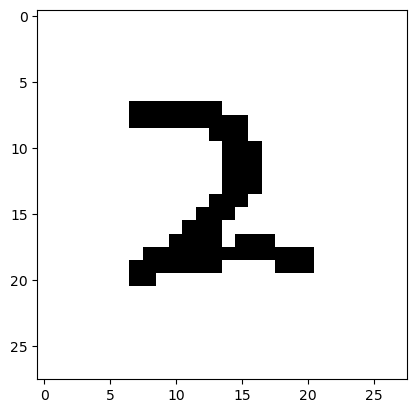

In [7]:
col_len = col_right - col_left + 1
row_len = row_bot - row_top + 1

col_start = int((28 - col_len) / 2)
row_start = int((28 - row_len) / 2)

print(col_len,row_len,col_start,row_start)

new_sample = np.zeros((28,28),dtype="int64")

# rebase into a center
new_sample[row_start:row_start+row_len, col_start:col_start+col_len] = sample_num[row_top:row_bot+1, col_left:col_right+1]
plot_digit(new_sample)
plt.show()

so the plan here is quite simple; get the boundary of the data, and rebase into the center
test done, so let's define the function and apply to all of our data

In [8]:
def rebase_center(num_data):
    r = 28
    c = 28
    
    temp_num = np.reshape(num_data, (r,c))
    

    # each boundary
    r_top = r
    r_bot = -1
    c_left = c
    c_right = -1

    for n in range(r):
        for m in range(c):
            
            # if the pixel has whatever value
            if temp_num[n][m] != 0:
                # update the boundary
                r_top = min(r_top, n)
                r_bot = max(r_bot, n)
                c_left = min(c_left, m)
                c_right = max(c_right, m)
    
    # print(r_top,r_bot,c_left,c_right)
    
    c_len = c_right - c_left + 1
    r_len = r_bot - r_top + 1

    c_start = int((c - c_len) / 2)
    r_start = int((r - r_len) / 2)

    # print(c_len,r_len,c_start,r_start)

    rebased_data = np.zeros((r,c),dtype="int64")

    # rebase into a center
    rebased_data[r_start:r_start+r_len, c_start:c_start+c_len] = temp_num[r_top:r_bot+1, c_left:c_right+1]
    
    return np.reshape(rebased_data, r*c)

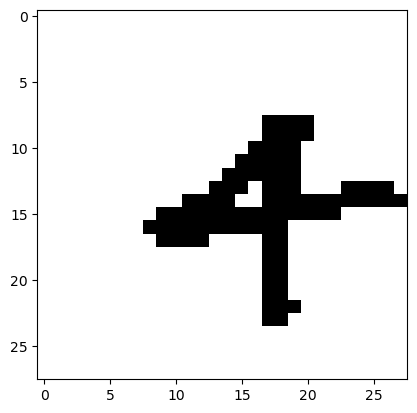

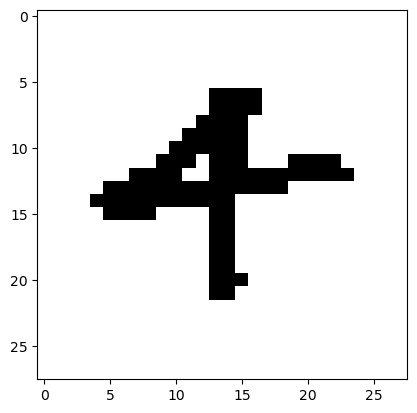

In [9]:
test_num = my_data_num["img"][4]
plot_digit(test_num)
plt.show()
test_num = rebase_center(test_num)
plot_digit(test_num)
plt.show()

## rebase - our data

In [10]:
num_test_size = np.shape(my_data_num["img"])[0]
sym_test_size = np.shape(my_data_sym["img"])[0]

num_rebased = my_data_num["img"]
sym_rebased = my_data_sym["img"]

print(num_test_size)

for i in range(num_test_size):
    num_rebased[i] = rebase_center(num_rebased[i])
    sym_rebased[i] = rebase_center(sym_rebased[i])

1600


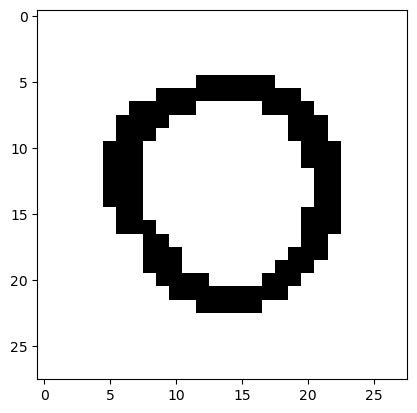

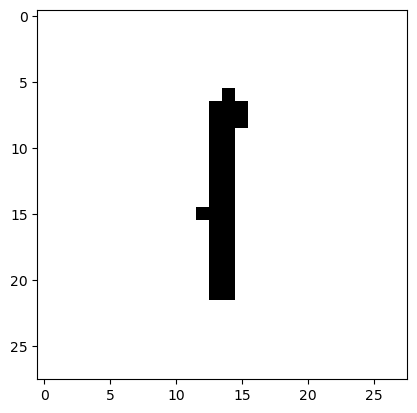

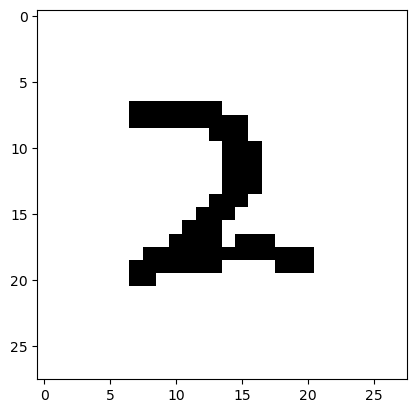

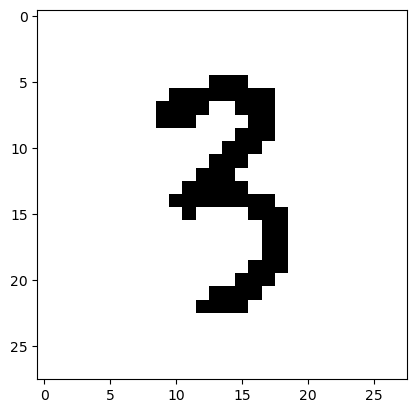

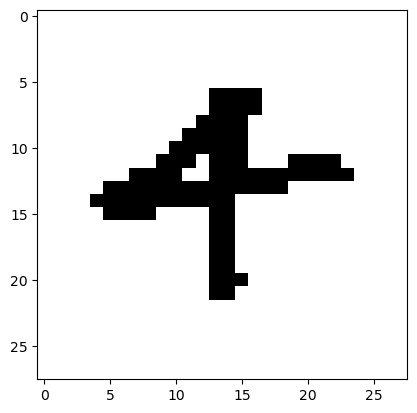

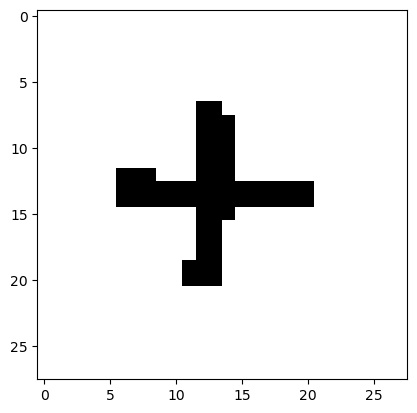

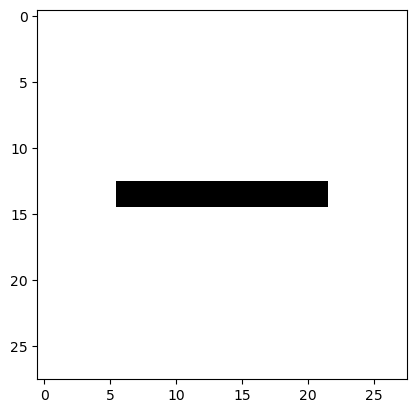

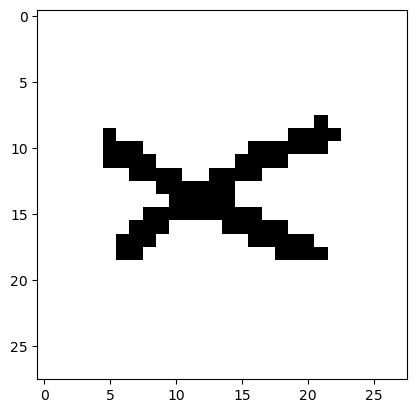

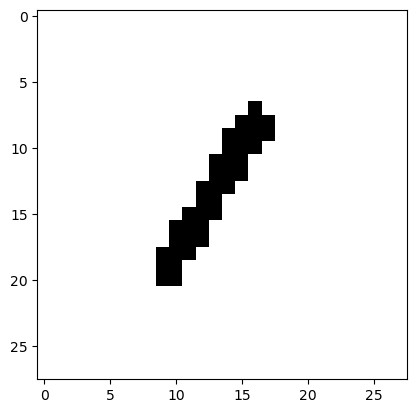

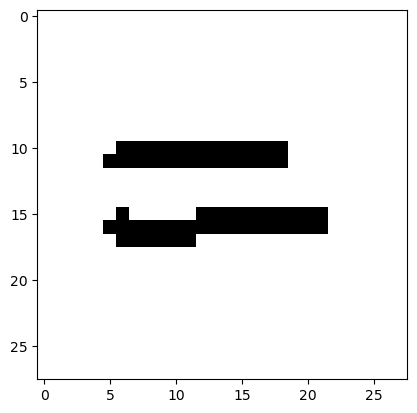

In [11]:
for i in range(5):
    plot_digit(num_rebased[i])
    plt.show()

for i in range(5):
    plot_digit(sym_rebased[i])
    plt.show()

In [12]:
np.savez_compressed(path / 'rebased_final_num.npz',img=num_rebased,label=my_data_num["label"])
np.savez_compressed(path / 'rebased_final_sym.npz',img=sym_rebased,label=my_data_sym["label"])
my_data_sym.close()
my_data_num.close()

## real data rebase

In [13]:
path = Path() / "npz" / "asdf"

In [14]:
all_num_test = np.load(path / "digit_data_10_Test_corrected.npz")
all_num_trVal = np.load(path / "digit_data_TrVal_corrected.npz")
all_sym_test = np.load(path / "op_data_10_Test_corrected.npz")
all_sym_trVal = np.load(path / "op_data_TrVal_corrected.npz")

In [15]:
print(
all_num_test["img"].shape,
all_num_trVal["img"].shape,
all_sym_test["img"].shape,
all_sym_trVal["img"].shape
)

(2112, 28, 28) (14775, 28, 28) (2238, 28, 28) (15673, 28, 28)


so now we have every data, let's do the exact same thing(with large amount)

In [16]:
num_trVal_size = np.shape(all_num_trVal["img"])[0]
sym_trVal_size = np.shape(all_sym_trVal["img"])[0]

num_test_size = np.shape(all_num_test["img"])[0]
sym_test_size = np.shape(all_sym_test["img"])[0]

num_trVal_rebased = np.reshape(all_num_trVal["img"], (num_trVal_size, 784))
sym_trVal_rebased = np.reshape(all_sym_trVal["img"], (sym_trVal_size, 784))

num_test_rebased = np.reshape(all_num_test["img"], (num_test_size, 784))
sym_test_rebased = np.reshape(all_sym_test["img"], (sym_test_size, 784))

print(num_trVal_size)
print(sym_trVal_size)

print(num_test_size)
print(sym_test_size)

for i in range(num_trVal_size):
    num_trVal_rebased[i] = rebase_center(num_trVal_rebased[i])
    
for i in range(sym_trVal_size):
    sym_trVal_rebased[i] = rebase_center(sym_trVal_rebased[i])

for i in range(num_test_size):
    num_test_rebased[i] = rebase_center(num_test_rebased[i])

for i in range(sym_test_size):
    sym_test_rebased[i] = rebase_center(sym_test_rebased[i])

14775
15673
2112
2238


In [17]:
# set 1. to int value 255
# num_trVal_rebased[num_trVal_rebased == 1.] = 255.
# num_trVal_rebased = num_trVal_rebased.astype(np.int64)
# 
# sym_trVal_rebased[sym_trVal_rebased == 1.] = 255.
# sym_trVal_rebased = sym_trVal_rebased.astype(np.int64)
# 
# num_test_rebased[num_test_rebased == 1.] = 255.
# num_test_rebased = num_test_rebased.astype(np.int64)
# 
# sym_test_rebased[sym_test_rebased == 1.] = 255.
# sym_test_rebased = sym_test_rebased.astype(np.int64)

this is not that important, just changing 1. to integer 255

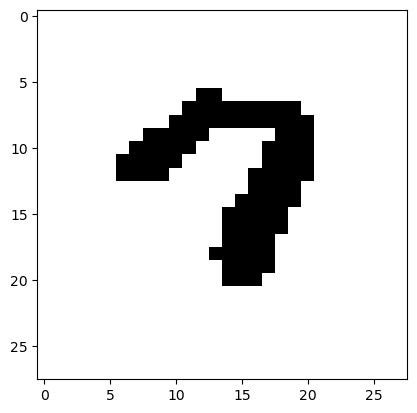

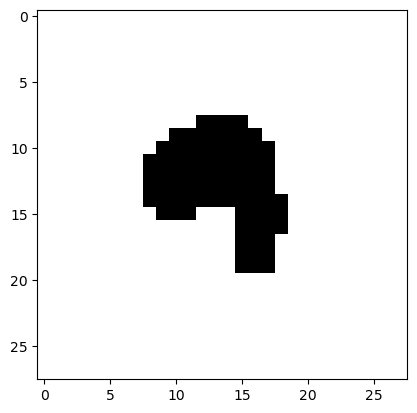

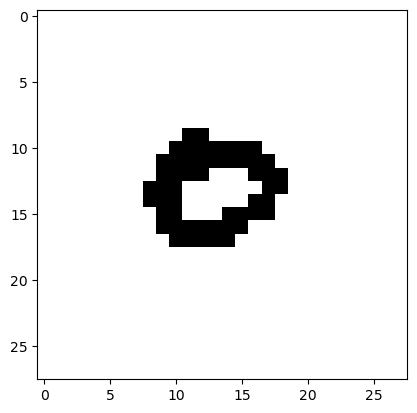

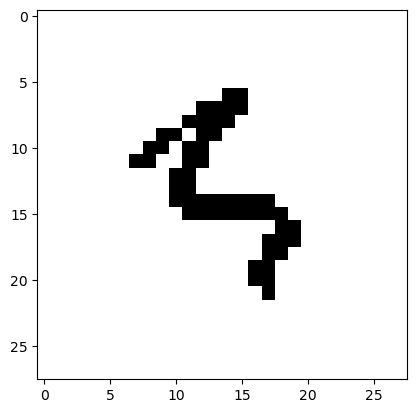

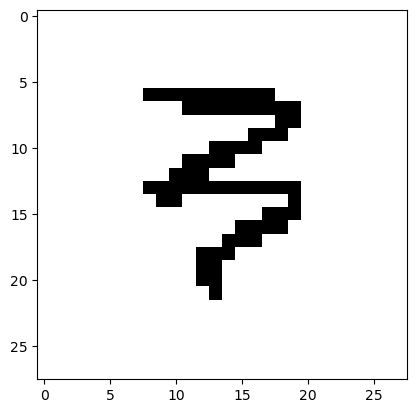

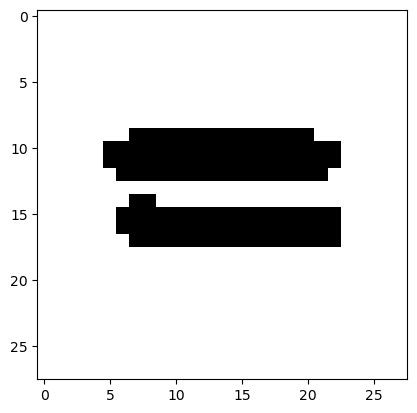

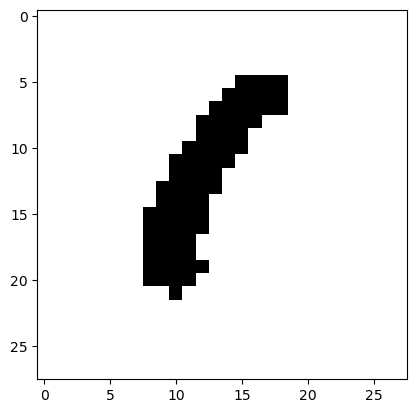

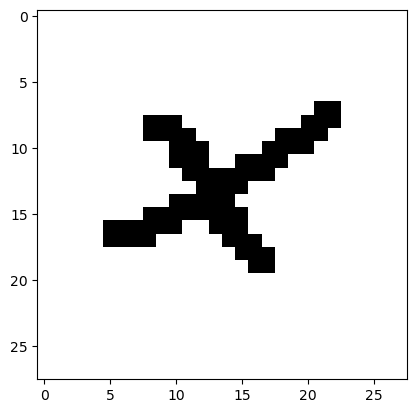

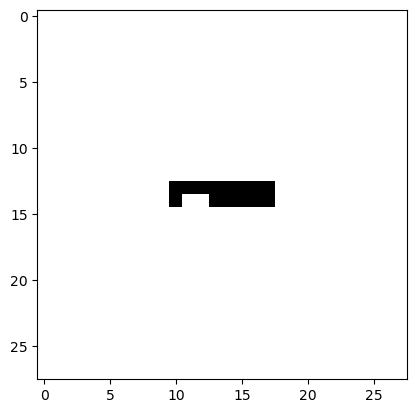

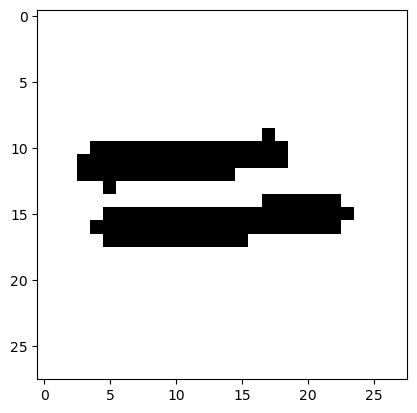

In [18]:
for i in range(5):
    plot_digit(num_trVal_rebased[i])
    plt.show()

for i in range(5):
    plot_digit(sym_trVal_rebased[i])
    plt.show()

In [19]:
np.savez_compressed(path / 'digit_data_10_Test_rebased.npz', img = num_test_rebased, label=all_num_test["label"])
np.savez_compressed(path / 'op_data_10_Test_rebased.npz', img= sym_test_rebased, label=all_sym_test["label"])
np.savez_compressed(path / 'digit_data_TrVal_rebased.npz', img = num_trVal_rebased, label=all_num_trVal["label"])
np.savez_compressed(path / 'op_data_TrVal_rebased.npz', img= sym_trVal_rebased, label=all_sym_trVal["label"])

all_num_test.close()
all_num_trVal.close()
all_sym_test.close()
all_sym_trVal.close()

## check

In [21]:
check_num_test = np.load(path / 'digit_data_10_Test_rebased.npz')
check_sym_test = np.load(path / 'op_data_10_Test_rebased.npz')
check_num_trVal = np.load(path / 'digit_data_TrVal_rebased.npz')
check_sym_trVal = np.load(path / 'op_data_TrVal_rebased.npz')

In [22]:
print(check_num_test['img'].shape,check_num_test['label'].shape)
print(check_sym_test['img'].shape,check_sym_test['label'].shape)
print(check_num_trVal['img'].shape,check_num_trVal['label'].shape)
print(check_sym_trVal['img'].shape,check_sym_trVal['label'].shape)

(2112, 784) (2112,)
(2238, 784) (2238,)
(14775, 784) (14775,)
(15673, 784) (15673,)


In [23]:
check_num_test.close()
check_sym_test.close()
check_num_trVal.close()
check_sym_trVal.close()